#**AutoML sklearn**

[https://automl.github.io/auto-sklearn/master/]

Automatización de Machine Learning. Selección del mejor modelo, optimización y sintonización de hiperparámetros.

## Objetivos:

*   ML más accesible
*   Mejorar la eficiencia de ML
*   Acelerar la investigación y aplicaciones en IA

## Limitaciones:

*   Aún no es plug and play
*   Mucho desarrollo en versión alfa
*   Posible incompatibilidad de librerías



## Instalación

In [1]:
# Instalamos requirements.txt
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip3 install

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   209  100   209    0     0    900      0 --:--:-- --:--:-- --:--:--   900
     |████████████████████████████████| 22.3MB 1.7MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 706kB 8.4MB/s 
     |████████████████████████████████| 952kB 12.1MB/s 
     |████████████████████████████████| 112kB 41.2MB/s 
  Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0
  Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0
  Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.

In [2]:
# Instalamos auto-sklearn
!pip3 install auto-sklearn

     |████████████████████████████████| 6.1MB 6.3MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.12.6-cp37-none-any.whl size=6370105 sha256=3d34b8c7f0673a55984989cf1183fb44cff91ac6d268715f4014616effc9e629
  Stored in directory: /root/.cache/pip/wheels/5f/c8/1f/3a6d11c1e156bf431e7cc4c4ff27e71059acc9638caa11ab35
Successfully built auto-sklearn


In [3]:
# instalamos la última versión de SWIG
!sudo apt-get install build-essential swig python3-dev

# DESPUES DE EJECUTAR ESTA CELDA, REINICIAR RUNTIME (RESTART RUNTIME)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
python3-dev is already the newest version (3.6.7-1~18.04).
python3-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 34 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 1s (776 kB/s)
debconf: unable to 

## AutoML para el dataset digits

In [1]:
# Verificamos versión de sklearn
import sklearn
sklearn.__version__

'0.24.2'

In [2]:
# Importamos las dependencias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from autosklearn.classification import AutoSklearnClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

/usr/local/lib/python3.7/dist-packages/pyparsing.py:3190: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


In [3]:
# Cargamos el dataset
digits = load_digits()
digits.data.shape

(1797, 64)

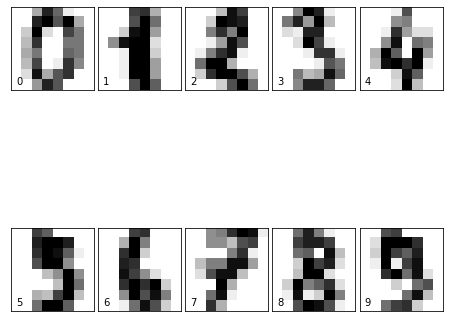

In [4]:
# Mostramos los digitos en imágenes
fig = plt.figure(figsize=(6, 6))  
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

In [5]:
# Dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,random_state=0)

In [6]:
# Definimos el modelo de autoML, especificamos el tiempo total de ejecuciòn y el tiempo por modelo
AutoMLmodel = AutoSklearnClassifier(time_left_for_this_task=6*60,
                              per_run_time_limit=60,
                              include_estimators=["random_forest","libsvm_svc","mlp"]
                              #include_estimators=["mlp"]
                              )

# Entrenamos el modelo con los datos Xtrain y ytrain
AutoMLmodel.fit(Xtrain, ytrain)

# Presentamos las estadísticas de la ejecución
print(AutoMLmodel.sprint_statistics())

AutoMLmodel.score(Xtest,ytest)


[WARNING] [2021-04-30 14:04:54,521:Client-AutoMLSMBO(1)::093e7852-a9bd-11eb-8208-0242ac1c0002] Configuration 124 not found
[WARNING] [2021-04-30 14:04:54,521:Client-AutoMLSMBO(1)::093e7852-a9bd-11eb-8208-0242ac1c0002] Configuration 707 not found
[WARNING] [2021-04-30 14:04:54,521:Client-AutoMLSMBO(1)::093e7852-a9bd-11eb-8208-0242ac1c0002] Configuration 571 not found
[WARNING] [2021-04-30 14:04:54,521:Client-AutoMLSMBO(1)::093e7852-a9bd-11eb-8208-0242ac1c0002] Configuration 352 not found
[WARNING] [2021-04-30 14:04:54,522:Client-AutoMLSMBO(1)::093e7852-a9bd-11eb-8208-0242ac1c0002] Configuration 615 not found
[WARNING] [2021-04-30 14:04:54,522:Client-AutoMLSMBO(1)::093e7852-a9bd-11eb-8208-0242ac1c0002] Configuration 56 not found
[WARNING] [2021-04-30 14:04:54,522:Client-AutoMLSMBO(1)::093e7852-a9bd-11eb-8208-0242ac1c0002] Configuration 617 not found
[WARNING] [2021-04-30 14:04:54,522:Client-AutoMLSMBO(1)::093e7852-a9bd-11eb-8208-0242ac1c0002] Configuration 129 not found
[WARNING] [2021-0

0.9911111111111112

In [7]:
# Mostramos los detalles de los modelos ejecutados
print(AutoMLmodel.show_models())

[(0.120000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'libsvm_svc', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'median', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'normalize', 'feature_preprocessor:__choice__': 'extra_trees_preproc_for_classification', 'classifier:libsvm_svc:C': 29.321060284951564, 'classifier:libsvm_svc:gamma': 3.2496725138305638, 'classifier:libsvm_svc:kernel': 'rbf', 'classifier:libsvm_svc:max_iter': -1, 'classifier:libsvm_svc:shrinking': 'False', 'classifier:libsvm_svc:tol': 9.821349679745702e-05, 'feature_preprocessor:extra_trees_preproc_for_classification:bootstrap': 'False', 'feature_preprocessor:extra_trees_preproc_for_classification:criterion': 'entropy', 'feature_preprocessor:ex

In [8]:
# Mostramos el mejor modelo
AutoMLmodel.cv_results_['params'][np.argmax(AutoMLmodel.cv_results_['mean_test_score'])]

{'balancing:strategy': 'weighting',
 'classifier:__choice__': 'libsvm_svc',
 'classifier:libsvm_svc:C': 29.321060284951564,
 'classifier:libsvm_svc:gamma': 3.2496725138305638,
 'classifier:libsvm_svc:kernel': 'rbf',
 'classifier:libsvm_svc:max_iter': -1,
 'classifier:libsvm_svc:shrinking': 'False',
 'classifier:libsvm_svc:tol': 9.821349679745702e-05,
 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding',
 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense',
 'data_preprocessing:numerical_transformer:imputation:strategy': 'median',
 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'normalize',
 'feature_preprocessor:__choice__': 'extra_trees_preproc_for_classification',
 'feature_preprocessor:extra_trees_preproc_for_classification:bootstrap': 'False',
 'feature_preprocessor:extra_trees_preproc_for_classification:criterion': 'entropy',
 'feature_preprocessor:extra_trees_preproc_for_clas

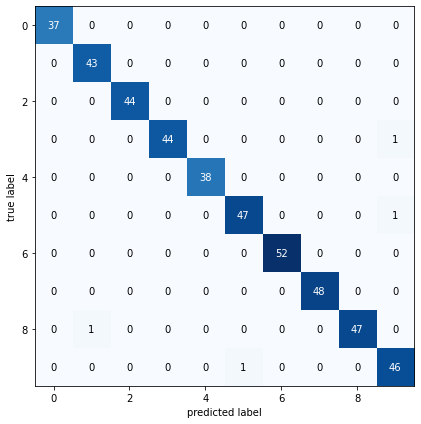

In [9]:
# Mostramos la matriz de confusión
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

ypred = AutoMLmodel.predict(Xtest)
matriz = confusion_matrix(ytest,ypred)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()